<a href="https://colab.research.google.com/github/KaniaruIvy/Compiler-Construction/blob/main/Lab_Activity_1_Compiler_Construction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

118751-Amugo Tatyana
118465-Maccine Quincy
115774-Kaniaru Ivy
120190-Lusiji Lyvia
120304-Owira Keith

#**FLEX**

FLEX (Fast Lexical analyzer generator) is a tool for generating scanners which are programs that perform lexical analysis to recognize lexical patterns in text. Therefore, instead of writing a scanner from scratch, you only need to identify the vocabulary of a certain language (e.g. Simple), write a specification of patterns using regular expressions (e.g. DIGIT [0-9]), and FLEX will construct a scanner for you.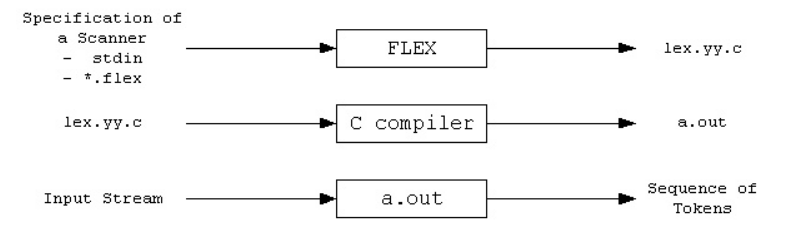



###How FLEX works



*  First, FLEX reads a specification of a scanner either from an input file *.lex (which is inform of pairs of regular expressions and C code),
or from standard input.
* Then it generates as output a C source file lex.yy.c which defines a routine yylex() that uses the specification to recognize tokens.

*   The lex.yy.c is compiled and linked with the "-lfl" library to produce an executable a.out which is the scanner. 
* Finally, a.out analyzes its input stream and transforms it into a sequence of tokens.

###Program Structure
The input file has 3 sections:
1.   Definition Section - This contains  declarations of simple name definitions, variables and manifest constants to simplify the scanner specification.The text in this section is enclosed in “%{ %}” brackets and is copied directly onto the lex.yy.c.

```
%{
   // Definitions
%}
```
2.   The Rules Section - The rules section contains a series of rules in the form: pattern action and pattern must be unindented and action begin on the same line in {} brackets. The rule section is enclosed in “%% %%”.


```
%%
pattern  action
%%
```

3. The User Code Section - It contains C statements and additional functions which can be compiled separately and loaded with the lexical analyzer

Thus the basic program structure looks like so:
```
%{
// Definitions
%}

%%
Rules
%%

User code section
```










##Example: Count the number of characters in a string 


```
/*** Definition Section has one variable
which can be accessed inside yylex() 
and main() ***/
%{
int count = 0;
%}
  
/*** Rule Section has three rules, first rule 
matches with capital letters, second rule
matches with any character except newline and 
third rule does not take input after the enter***/
%%
[A-Z] {printf("%s capital letter\n", yytext);
       count++;}
.     {printf("%s not a capital letter\n", yytext);}
\n    {return 0;}
%%
  
/*** Code Section prints the number of
capital letter present in the given input***/
int yywrap(){}
int main(){
  
// Explanation:
// yywrap() - wraps the above rule section
/* yyin - takes the file pointer 
          which contains the input*/
/* yylex() - this is the main flex function
          which runs the Rule Section*/
// yytext is the text in the buffer
  
// Uncomment the lines below 
// to take input from file
// FILE *fp;
// char filename[50];
// printf("Enter the filename: \n");
// scanf("%s",filename);
// fp = fopen(filename,"r");
// yyin = fp;
  
yylex();
printf("\nNumber of Capital letters " 
      "in the given input - %d\n", count);
  
return 0;
}
```



# **LEX**

Lex is a program designed to generate scanners, also known as tokenizers, which recognize lexical patterns in text. Lex is an acronym that stands for "lexical analyzer generator." It accepts a high-level, problem oriented specification for character string matching, and produces a program in a general purpose language which recognizes regular expressions.

Lex turns the user's expressions and actions into the host general-purpose language; the generated program is named yylex. The yylex program will recognize expressions in a stream and perform the specified actions for each expression as it is detected. This is demonstrated in the figure below.


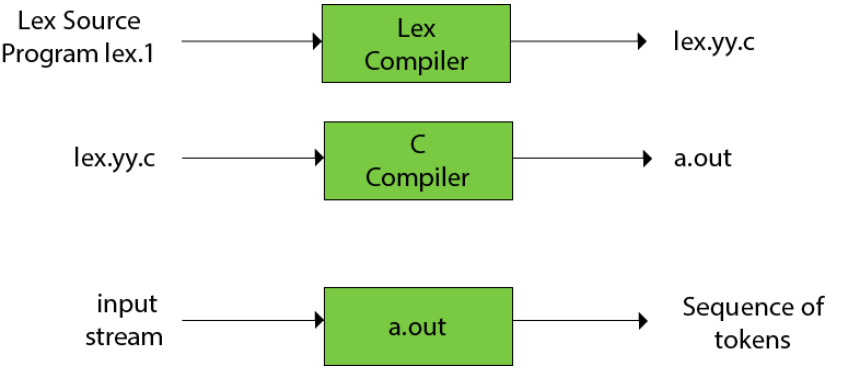

The lex command generates a C language program that can analyze an input stream using information in the specification file. The lex command then stores the output program in a lex.yy.c file. If the output program recognizes a simple, one-word input structure, you can compile the lex.yy.c output file with the following command to produce an executable lexical analyzer:



```
cc lex.yy.c -ll
```
To compile a lex program:
1. Use the lex program to change the specification file into a C language program. The resulting program is in the lex.yy.c file.
2. Use the cc command with the -ll flag to compile and link the program with a library of lex subroutines. The resulting executable program is in the a.out file.

For example, if the lex specification file is called lextest, enter the following commands



```
lex lextest
cc lex.yy.c -ll
```


 The code below is a sample lex code that counts the total number of tokens


```
/*Lex code to count total number of tokens */
  
%{ 
int n = 0 ;  
%}   
// rule section
%%  
//count number of keywords
"while"|"if"|"else" {n++;printf("\t keywords : %s", yytext);}  
  
// count number of keywords
"int"|"float" {n++;printf("\t keywords : %s", yytext);}   
  
// count number of identifiers
[a-zA-Z_][a-zA-Z0-9_]* {n++;printf("\t identifier : %s", yytext);} 
  
// count number of operators
"<="|"=="|"="|"++"|"-"|"*"|"+" {n++;printf("\t operator : %s", yytext);}
  
// count number of separators
[(){}|, ;]    {n++;printf("\t separator : %s", yytext);} 
  
// count number of floats
[0-9]*"."[0-9]+ {n++;printf("\t float : %s", yytext);}  
  
// count number of integers
[0-9]+ {n++;printf("\t integer : %s", yytext);}                        
  
.    ;
%%  
   
int main() 
  
{    
    yylex();
      
    printf("\n total no. of token = %d\n", n);     
}
```



# **YACC**

YACC (Yet Another Compiler Compiler) is a tool used for describing input to a computer program.First the user defines specifications:


*   Rules that describe the input elements.
*   The code that is to be invoked when a rule is recognized.

*   A definition or declaration of a low-level scanner that examines the input.

YACC then converts the specifications into subroutines that are responsible for examining the input stream.
This is referred to as parsing and it works by a call to a low-level scanner.

The scanner also referred to as a lexical analyzer take items from the input stream - tokens and compares them to the construct rules - grammar.
If a rule is identified, a subroutine is invoked - action, which is a fragment of C-language code that returns values and uses values returned by other actions.

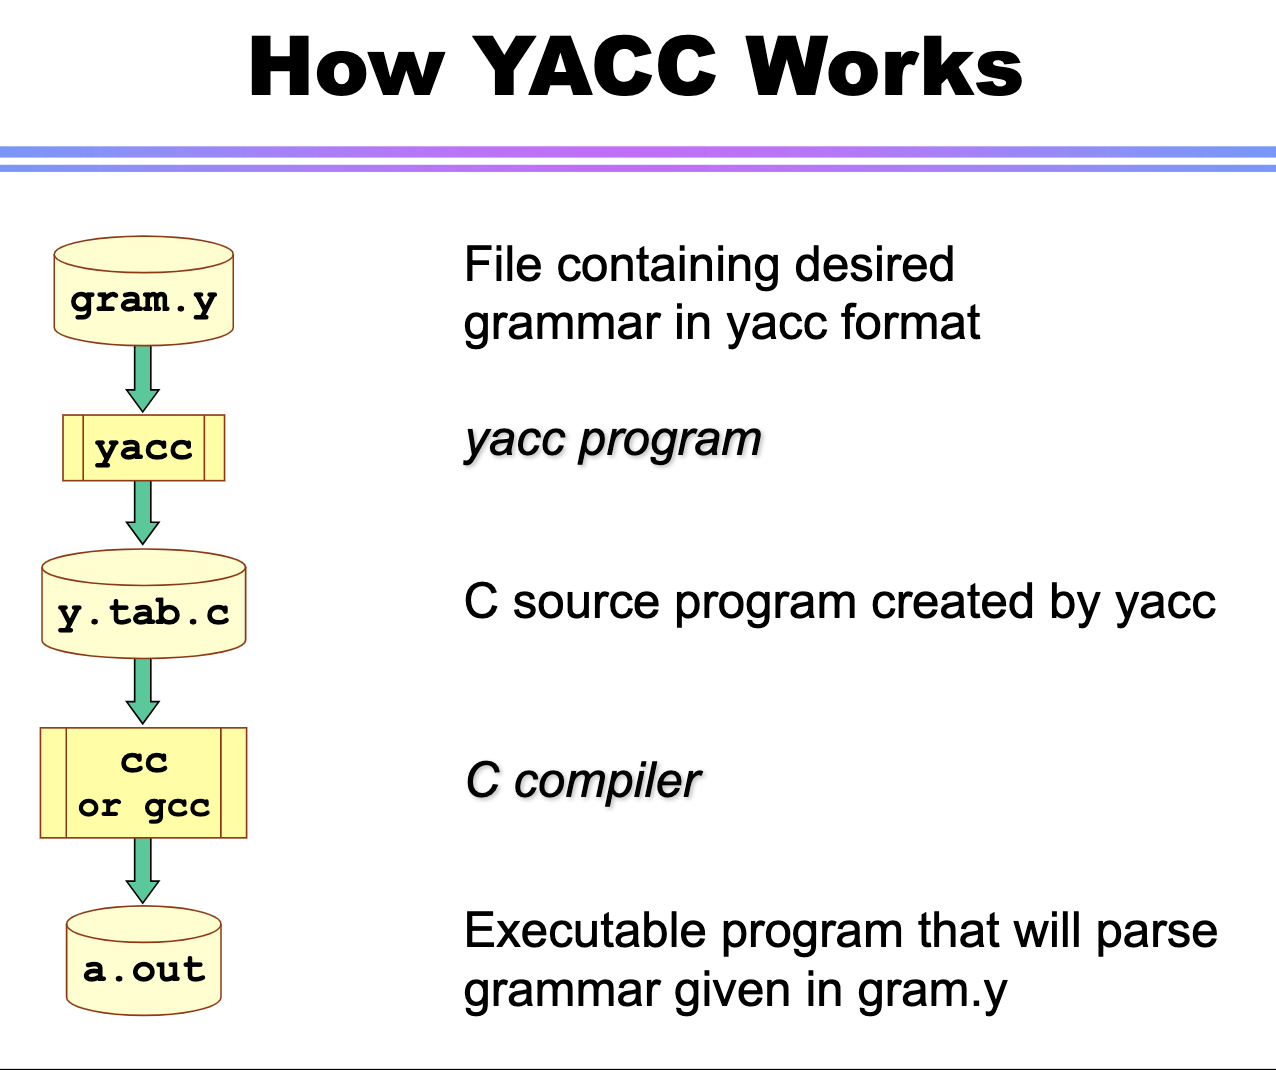

Below is a yacc input file for a simple calculator that not only recognizes binary postfix expressions and also evaluates them using a stack data structure.

In [ ]:
%{  
    #include <stdio.h>
    #include <assert.h>
    
    static int Pop();
    static int Top();
    static void Push(int val);
%}

%token T_Int

%%
S    :    S E '\n' { printf("= %d\n", Top()); }
     |    
     ;
     
E    :  E E '+' { Push(Pop() + Pop()); }
     |  E E '-' { int op2 = Pop(); Push(Pop() - op2); }
     |  E E '*' { Push(Pop() * Pop()); }
     |  E E '/' { int op2 = Pop(); Push(Pop() / op2); }
     |  T_Int   { Push(yylval); }    
     ;
%%

static int stack[100], count = 0;

static int Pop(){
    assert(count > 0);
    return stack[--count];
}
static int Top(){
    assert(count > 0);
    return stack[count-1];
}
static void Push(int val){
    assert(count < sizeof(stack)/sizeof(*stack));
    stack[count++] = val;
}

int main(){
    return yyparse();
}

Now to create a scanner for the parser. The following is a lex file we use:

In [ ]:
%{  
    #include "y.tab.h"
%}
%%
[0-9]+    { 
              yylval = atoi(yytext); 
              return T_Int;
          }
[-+*/\n]  { 
              return yytext[0];
          }

The makefile:

In [ ]:
calc:        lex.yy.o y.tab.o
             gcc -o calc lex.yy.o y.tab.o  -ly -ll
        
lex.yy.c:    calc.l y.tab.c
             flex calc.l
             
y.tab.c:     calc.y
             bison -vdty calc.y



```
# This is formatted as code
```

# **BISON**

Bison is a general-purpose parser generator that converts a grammar description bold text(Bison Grammar Files) for an LALR(1) context-free grammar into a C program to parse that grammar. The Bison parser is a bottom-up parser. It tries, by shifts and reductions, to reduce the entire input down to a single grouping whose symbol is the grammar's start-symbol.
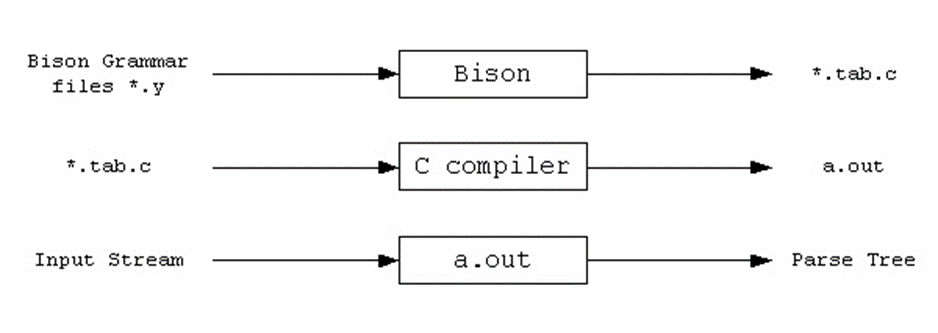

Steps to use Bison:
•	 Write a lexical analyzer to process input and pass tokens to the parser (calc.lex).

•	 Write the grammar specification for bison (calc.y), including grammar rules, yyparse() and yyerror().

•	 Run Bison on the grammar to produce the parser. (Makefile)

•	 Compile the code output by Bison, as well as any other source files.

•	 Link the object files to produce the finished product.

Here is the Bison code for calc.y, an infix desk-top calculator:


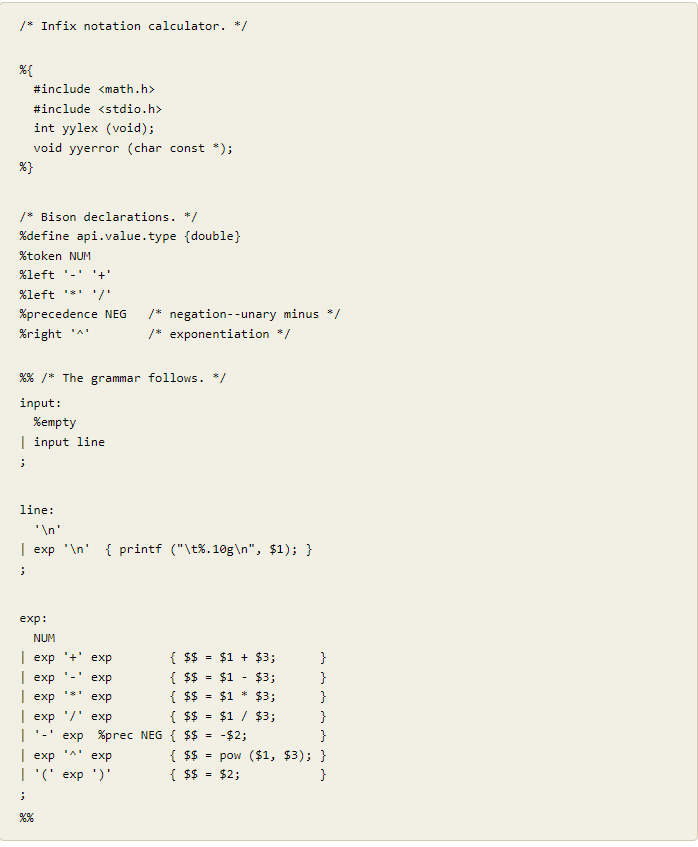

Here is a sample run of calc.y:


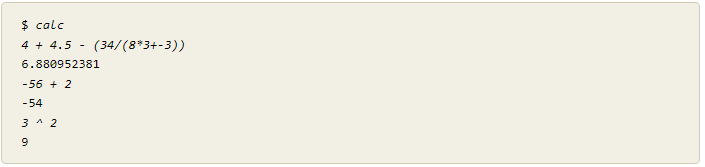


# References

* Generating a lexical analyzer with the lex command. (n.d.). IBM. Retrieved September 8, 2022, from https://www.ibm.com/docs/en/aix/7.2?topic=information-generating-lexical-analyzer-lex-command
* Lex - A Lexical Analyzer Generator. (n.d.). The LEX & YACC Page. Retrieved September 8, 2022, from http://dinosaur.compilertools.net/lex/index.html
* Lex code to count total number of tokens. (2019, May 21). GeeksforGeeks. Retrieved September 8, 2022, from https://www.geeksforgeeks.org/lex-code-to-count-total-number-of-tokens/
* LEX - javatpoint. (n.d.). Javatpoint. Retrieved September 8, 2022, from https://www.javatpoint.com/lex
*   https://iq.opengenus.org/yacc-and-bison/




*   Bison Tutorial. (n.d.). Retrieved September 11, 2022, from http://alumni.csucredu/~lgao/teaching/bison.html
*   Denny, J. E., & Malloy, B. A. (2008). IELR(1): Practical LR(1) parser tables for non-LR(1) grammars with conflict resolution. Proceedings of the 2008 ACM Symposium on Applied Computing  - SAC ’08, 240. https://doi.org/10.1145/1363686.1363747


*   DeRemer, F., & Pennello, T. (1982). Efficient Computation of LALR(1) Look-Ahead Sets. ACM Transactions on Programming Languages and Systems, 4(4), 615–649. https://doi.org/10.1145/69622.357187
*  Johnson, S. C. (1978). A portable compiler: Theory and practice. Proceedings of the 5th ACM SIGACT-SIGPLAN Symposium on Principles of Programming Languages  - POPL ’78, 97–104. https://doi.org/10.1145/512760.512771
*  FLEX Tutorial. (n.d.). Retrieved September 11, 2022, from http://alumni.cs.ucr.edu/~lgao/teaching/flex.html
*  Flex—A scanner generator. (n.d.). Retrieved September 11, 2022, from https://www.cs.princeton.edu/~appel/modern/c/software/flex/flex.html
* Aaby, A. A. (n.d.). Compiler Construction using Flex and Bison. 102.
https://www.admb-project.org/tools/flex/compiler.pdf
* Flex (Fast Lexical Analyzer Generator ). (2018, April 12). GeeksforGeeks. https://www.geeksforgeeks.org/flex-fast-lexical-analyzer-generator/









